In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    'a1': ['one']*3 +['two']*4,
    'a2': [1,1,2,3,3,4,4]
})

data

,a1,a2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [3]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [4]:
data_sin_dup = data.drop_duplicates()
data_sin_dup

,a1,a2
0,one,1
2,one,2
3,two,3
5,two,4


In [5]:
data_reducido = data_sin_dup.drop_duplicates('a1')
data_reducido

,a1,a2
0,one,1
3,two,3


## Transformación de datos.

In [6]:
data = pd.DataFrame({
    'food'  : ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
    'oz'    : [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
})

data

,food,oz
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [7]:
meat_to_animal = {
    'bacon':        'pig',
    'pulled pork':  'pig',
    'pastrami':     'cow',
    'corned beef':  'cow',
    'honey ham':    'pig',
    'nova lox':     'salmon'
}

In [8]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,oz,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [9]:
data = pd.Series([1., -999, 2, -999, -1000, 3.0])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [13]:
data_nan = data.replace(-999, np.nan)
data_nan

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [14]:
data_nan.replace(np.nan, -888)

0       1.0
1    -888.0
2       2.0
3    -888.0
4   -1000.0
5       3.0
dtype: float64

In [16]:
data_nan.replace([-888, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Discretización y binning.

In [18]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [19]:
bins = [18, 25, 35, 60, 100]

In [20]:
cat = pd.cut(ages, bins)
cat

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [23]:
cat.describe()

,counts,freqs
categories,,
"(18, 25]",5,0.416667
"(25, 35]",3,0.250000
"(35, 60]",3,0.250000
"(60, 100]",1,0.083333


In [29]:
cat.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [37]:
group_names = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

In [38]:
data_names = pd.cut(ages, bins, labels=group_names)
data_names

['Youth', 'Youth', 'Youth', 'Young Adult', 'Youth', ..., 'Young Adult', 'Senior', 'Middle Age', 'Middle Age', 'Young Adult']
Length: 12
Categories (4, object): ['Youth' < 'Young Adult' < 'Middle Age' < 'Senior']

In [41]:
data = np.random.rand(20)
data

array([0.04218479, 0.79704278, 0.17607298, 0.871238  , 0.82950998,
       0.4736117 , 0.5172341 , 0.02905192, 0.16643007, 0.17574848,
       0.93193282, 0.05413955, 0.28586675, 0.77678065, 0.03153157,
       0.03666553, 0.06667345, 0.27613024, 0.64341351, 0.07415129])

In [42]:
data_bins = pd.cut(data, 6, precision=2)
data_bins

[(0.028, 0.18], (0.78, 0.93], (0.028, 0.18], (0.78, 0.93], (0.78, 0.93], ..., (0.028, 0.18], (0.028, 0.18], (0.18, 0.33], (0.63, 0.78], (0.028, 0.18]]
Length: 20
Categories (6, interval[float64, right]): [(0.028, 0.18] < (0.18, 0.33] < (0.33, 0.48] < (0.48, 0.63] < (0.63, 0.78] < (0.78, 0.93]]

In [43]:
data_bins.describe()

,counts,freqs
categories,,
"(0.028, 0.18]",10,0.50
"(0.18, 0.33]",2,0.10
"(0.33, 0.48]",1,0.05
"(0.48, 0.63]",1,0.05
"(0.63, 0.78]",2,0.10
"(0.78, 0.93]",4,0.20


In [44]:
data_bins.codes

array([0, 5, 0, 5, 5, 2, 3, 0, 0, 0, 5, 0, 1, 4, 0, 0, 0, 1, 4, 0],
      dtype=int8)

In [47]:
data = np.random.randn(1000)
data

array([ 1.87028052e+00,  8.05666665e-01, -9.70520948e-01,  1.26843943e-01,
        2.50600253e-01, -1.47024114e+00,  2.41686281e-01,  3.37469879e-01,
       -2.40861244e-01,  1.07294155e-01, -9.76498607e-02, -7.61803019e-03,
       -1.46158942e-01,  7.81863018e-01,  2.29627702e-01,  1.12798959e+00,
        3.23420970e+00,  1.13247775e-01,  3.61983833e-02, -8.78318361e-01,
        1.56688811e+00,  2.28818496e-01, -3.51104459e-01, -1.65001960e-01,
       -1.36451450e+00, -6.13411427e-02, -4.11670602e-01, -6.87326930e-01,
       -5.29521370e-01, -8.55926736e-03, -2.83082625e-01,  1.40019492e-01,
        8.75226940e-01, -1.11500055e+00,  5.71782922e-01, -4.29364092e-01,
        7.76950576e-01,  8.99086116e-01,  3.69376253e-01,  2.33437069e-01,
        1.42449759e+00,  4.19678215e-01, -5.17530839e-01, -7.29135772e-01,
        2.92468636e-02,  8.90310575e-01,  1.05534265e+00, -1.11074613e-01,
       -4.61330144e-01, -1.26863933e+00,  5.80100271e-01,  9.09367018e-01,
        4.50996057e-01,  

In [48]:
cat = pd.qcut(data, 4)
cat

[(0.621, 3.234], (0.621, 3.234], (-3.3369999999999997, -0.716], (-0.0465, 0.621], (-0.0465, 0.621], ..., (-3.3369999999999997, -0.716], (-0.0465, 0.621], (-0.0465, 0.621], (-0.716, -0.0465], (-0.716, -0.0465]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.3369999999999997, -0.716] < (-0.716, -0.0465] < (-0.0465, 0.621] < (0.621, 3.234]]

In [49]:
cat.describe()

,counts,freqs
categories,,
"(-3.3369999999999997, -0.716]",250,0.25
"(-0.716, -0.0465]",250,0.25
"(-0.0465, 0.621]",250,0.25
"(0.621, 3.234]",250,0.25


In [51]:
data = pd.DataFrame(np.random.randn(1000, 4))
data

,0,1,2,3
0,-1.074586,0.602233,0.547752,-1.569289
1,0.919068,-0.084627,1.474180,-0.652527
2,1.366787,0.155971,-0.072812,0.690531
3,0.364304,-1.034162,1.705366,0.570044
4,-1.126597,0.205207,-0.569375,0.261776
...,...,...,...,...
995,0.547727,-0.580493,1.034864,-0.989205
996,-0.354196,1.203491,-0.382417,-1.251719
997,1.380386,-1.227430,0.281565,-0.102013
998,-1.023537,0.340287,-1.259633,0.093156


In [53]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.032448,0.064552,-0.010911,0.016663
std,1.003150,0.975375,1.001905,0.976625
min,-3.410264,-3.182385,-3.102914,-3.052280
25%,-0.642914,-0.567618,-0.673780,-0.642046
50%,0.022482,0.078678,0.007924,0.009524
75%,0.696213,0.713054,0.653241,0.691056
max,2.786250,2.549023,3.215145,3.100808


<AxesSubplot:ylabel='3'>

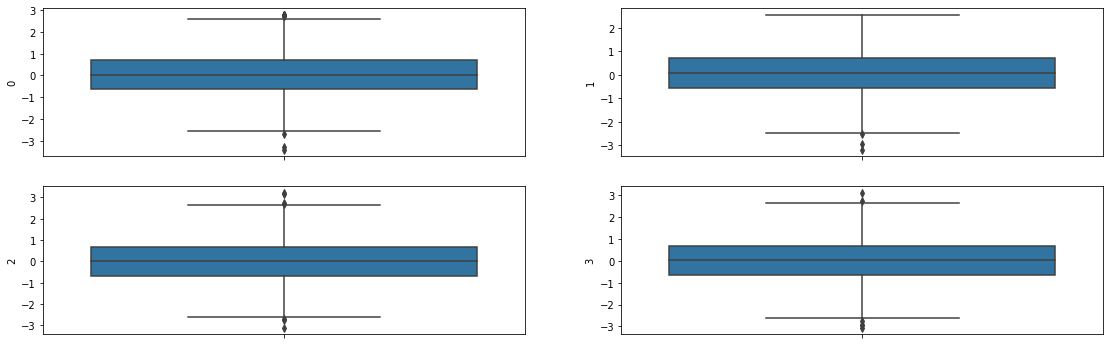

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(19, 6))
sns.boxplot(y=0, data=data, orient="v", ax=axes[0,0])
sns.boxplot(y=1, data=data, orient="v", ax=axes[0,1])
sns.boxplot(y=2, data=data, orient="v", ax=axes[1,0])
sns.boxplot(y=3, data=data, orient="v", ax=axes[1,1])
